In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests

from lightgbm import LGBMClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import StratifiedKFold

import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda, Bidirectional,Dropout,BatchNormalization,Flatten, GRU, MaxPool1D
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

### 트레인셋 데이터 불러오기

In [2]:
X= []
Y_ = []

f = open("train_data_4.csv" , 'r')
X = list(csv.reader(f, quoting = csv.QUOTE_NONNUMERIC))
X = np.array(X)
f.close()


f = open("train_label_0.csv" , 'r')
Y_ = list(csv.reader(f, quoting = csv.QUOTE_NONNUMERIC))
Y_ = np.array(Y_)
Y_ = Y_.T

f.close()

### 테스트셋 데이터 불러오기

In [5]:
XX = []
YY_ = []


f = open("test_data_4.csv" , 'r')
XX = list(csv.reader(f, quoting = csv.QUOTE_NONNUMERIC))
XX = np.array(XX)
f.close()


f = open("test_label_0.csv" , 'r')
YY_ = list(csv.reader(f, quoting = csv.QUOTE_NONNUMERIC))
YY_ = np.array(YY_)
YY_ = YY_.T
f.close()

In [6]:
YY_

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
      

In [7]:
np.shape(X)

(1374, 50)

In [8]:
np.shape(YY_)

(700, 1)

### 라벨 이진화

In [9]:
#트레인 라벨
Y = []
for i in range(1,36):    
    label = []
    for j in range(0,len(Y_)):
        if Y_[j] == i:
            label.append(1)
        if Y_[j] != i:
            label.append(0)
    Y.append(label)

In [11]:
Y[1]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [9]:
#테스트 라벨
YY = []
for i in range(1,36):    
    label = []
    for j in range(0,len(YY_)):
        if YY_[j] == i:
            label.append(1)
        if YY_[j] != i:
            label.append(0)

    YY.append(label)

In [11]:
np.shape(X)
np.shape(XX)

(700, 50)

In [12]:
XX = np.reshape(XX,(700, 50,1) )
XX = XX.tolist()

X = np.reshape(X,(1374, 50,1) )
X = X.tolist()

In [13]:
np.shape(X)

(1374, 50, 1)

In [14]:
import tensorflow as tf

In [15]:


YY_ = tf.keras.utils.to_categorical(YY_, num_classes=36) 
Y_ = tf.keras.utils.to_categorical(Y_, num_classes=36) 

In [16]:
np.shape(YY_)

(700, 36)

In [18]:
YY_ = YY_.tolist()

In [19]:
Y_ = Y_.tolist()

## 1d cnn test


In [20]:
model = Sequential([
    # 1차원 feature map 생성
    
    Conv1D(filters=16, kernel_size=5,
           activation="relu"),
    MaxPool1D(pool_size=2),
    BatchNormalization(),
    
    Conv1D(filters=32, kernel_size=3,
           activation="relu"),
    MaxPool1D(pool_size=2),
    BatchNormalization(),
    
    Conv1D(filters=64, kernel_size=3,
           activation="relu"),
    MaxPool1D(pool_size=2),
    BatchNormalization(),
    

    
    Flatten(),
    
    Dense(36, activation="softmax"),

])

In [21]:
optimizer = Adam(0.001)
model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

In [22]:
import os

earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [23]:
np.shape(Y_)

(1374, 36)

In [24]:
history = model.fit(x = X,
                    y = Y_,
                    epochs=80, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/80
43/43 [==============================] - 1s 3ms/step - loss: 2.8067 - acc: 0.2351
Epoch 2/80
43/43 [==============================] - 0s 3ms/step - loss: 1.8478 - acc: 0.5051
Epoch 3/80
43/43 [==============================] - 0s 3ms/step - loss: 1.4312 - acc: 0.6354
Epoch 4/80
43/43 [==============================] - 0s 3ms/step - loss: 1.1441 - acc: 0.7052
Epoch 5/80
43/43 [==============================] - 0s 3ms/step - loss: 0.9516 - acc: 0.7635
Epoch 6/80
43/43 [==============================] - 0s 3ms/step - loss: 0.8194 - acc: 0.7817
Epoch 7/80
43/43 [==============================] - 0s 3ms/step - loss: 0.7038 - acc: 0.8443
Epoch 8/80
43/43 [==============================] - 0s 3ms/step - loss: 0.6504 - acc: 0.8217
Epoch 9/80
43/43 [==============================] - 0s 3ms/step - loss: 0.5721 - acc: 0.8515
Epoch 10/80
43/43 [==============================] - 0s 3ms/step - loss: 0.5070 - acc: 0.8661
Epoch 11/80
43/43 [==============================] - 0s 3ms/step - lo

Epoch 23/80
43/43 [==============================] - 0s 3ms/step - loss: 0.1872 - acc: 0.9592
Epoch 24/80
43/43 [==============================] - 0s 3ms/step - loss: 0.2004 - acc: 0.9483
Epoch 25/80
43/43 [==============================] - 0s 3ms/step - loss: 0.1665 - acc: 0.9578
Epoch 26/80
43/43 [==============================] - 0s 3ms/step - loss: 0.1642 - acc: 0.9578
Epoch 27/80
43/43 [==============================] - 0s 3ms/step - loss: 0.1571 - acc: 0.9600
Epoch 28/80
43/43 [==============================] - 0s 3ms/step - loss: 0.1435 - acc: 0.9658
Epoch 29/80
43/43 [==============================] - 0s 3ms/step - loss: 0.1694 - acc: 0.9505
Epoch 30/80
43/43 [==============================] - 0s 3ms/step - loss: 0.1510 - acc: 0.9592
Epoch 31/80
43/43 [==============================] - 0s 3ms/step - loss: 0.1250 - acc: 0.9702
Epoch 32/80
43/43 [==============================] - 0s 3ms/step - loss: 0.1264 - acc: 0.9731
Epoch 33/80
43/43 [==============================] - 0s 3ms/

Epoch 45/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0671 - acc: 0.9876
Epoch 46/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0656 - acc: 0.9884
Epoch 47/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0617 - acc: 0.9862
Epoch 48/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0650 - acc: 0.9847
Epoch 49/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0585 - acc: 0.9913
Epoch 50/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0538 - acc: 0.9913
Epoch 51/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0578 - acc: 0.9891
Epoch 52/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0597 - acc: 0.9862
Epoch 53/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0657 - acc: 0.9833
Epoch 54/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0612 - acc: 0.9869
Epoch 55/80
43/43 [==============================] - 0s 3ms/

Epoch 67/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0395 - acc: 0.9891
Epoch 68/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0385 - acc: 0.9920
Epoch 69/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0368 - acc: 0.9964
Epoch 70/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0338 - acc: 0.9934
Epoch 71/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0342 - acc: 0.9956
Epoch 72/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0286 - acc: 0.9949
Epoch 73/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0298 - acc: 0.9956
Epoch 74/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0229 - acc: 0.9985
Epoch 75/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0185 - acc: 0.9985
Epoch 76/80
43/43 [==============================] - 0s 3ms/step - loss: 0.0220 - acc: 0.9964
Epoch 77/80
43/43 [==============================] - 0s 3ms/

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 46, 16)            96        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 23, 16)           0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 23, 16)           64        
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 21, 32)            1568      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 32)           0         
 1D)                                                             
                                                        

In [26]:
pred = model.predict(XX)
print(pred.shape)
print("\n 테스트 정확도: %.4f" % (model.evaluate(XX, YY_)[1]))

22/22 [==============================] - 0s 1ms/step
(700, 36)
22/22 [==============================] - 0s 1ms/step - loss: 0.2041 - acc: 0.9600

 테스트 정확도: 0.9600


In [27]:
# plt.figure(figsize=(12, 9))
# plt.plot(np.asarray(YY_), label='actual')
# plt.plot(pred, label='prediction')
# plt.legend()
# plt.show()

In [28]:
def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

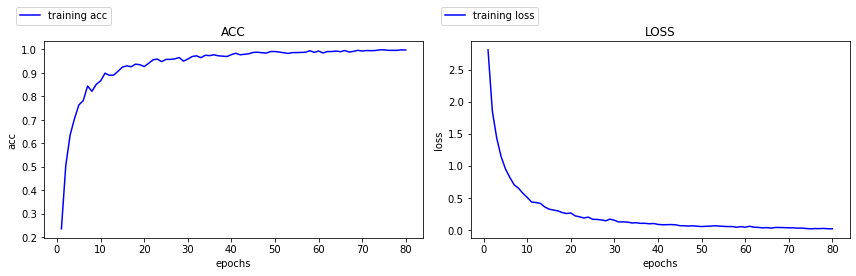

In [29]:
plot_history(history)

In [30]:
YY_ = tf.math.argmax(YY_,axis = 1)
pred = tf.math.argmax(pred,axis = 1)

In [31]:
# model.save('./ppg_96_4')

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(YY_, pred))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        31
           2       0.91      0.80      0.85        25
           3       0.71      1.00      0.83        15
           4       0.84      0.89      0.86        18
           5       1.00      0.95      0.98        22
           6       1.00      1.00      1.00        17
           7       0.83      0.87      0.85        23
           8       0.97      1.00      0.98        30
           9       1.00      0.97      0.98        30
          10       0.89      1.00      0.94        16
          11       0.96      1.00      0.98        24
          12       1.00      0.91      0.95        23
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00        22
          15       1.00      0.96      0.98        28
          16       0.96      1.00      0.98        23
          17       1.00      1.00      1.00        20
          18       0.88    